In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
data = pd.read_excel("/gdrive/My Drive/2025_2026_Derin_Ogrenme/Dry_Bean_Dataset.xlsx")
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

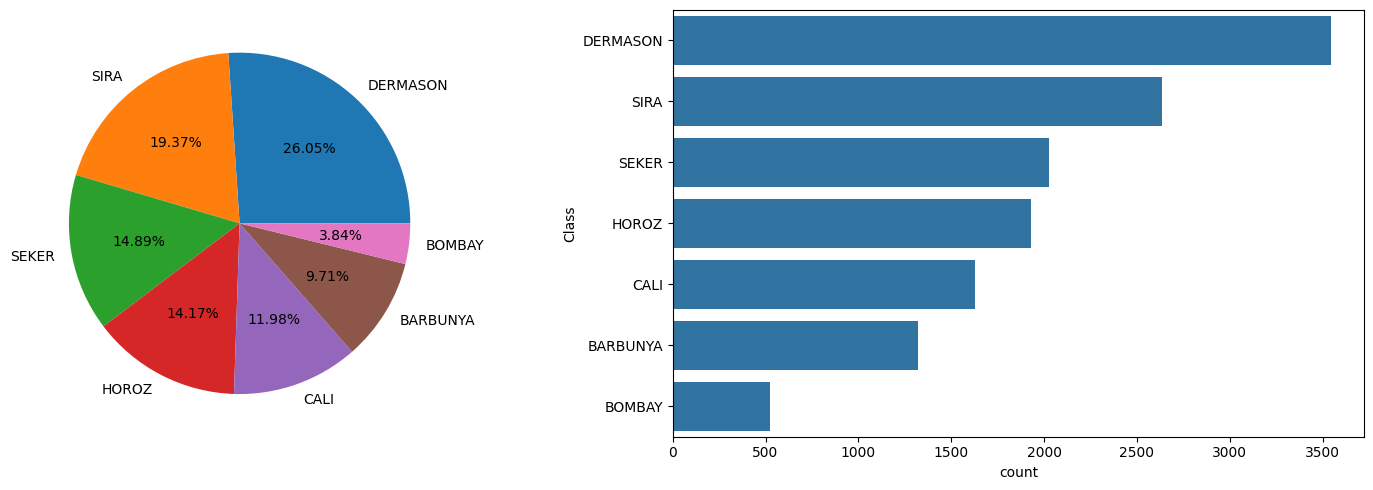

In [6]:
tdf = data['Class'].value_counts().reset_index()

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].pie(labels=tdf['Class'], x=tdf['count'], autopct='%.2f%%') # Pie chart
sns.barplot(data=tdf, y='Class', x='count',ax=ax[1]) # Bar plot
plt.tight_layout()
plt.show()

In [7]:
tdf


,Class,count
0,DERMASON,3546
1,SIRA,2636
2,SEKER,2027
3,HOROZ,1928
4,CALI,1630
5,BARBUNYA,1322
6,BOMBAY,522


In [9]:
data.isnull().any()


,0
Area,False
Perimeter,False
MajorAxisLength,False
MinorAxisLength,False
AspectRation,False
Eccentricity,False
ConvexArea,False
EquivDiameter,False
Extent,False
Solidity,False


In [10]:
data.drop_duplicates(inplace=True,keep='first')


In [13]:
data['Class'].value_counts()


,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1860
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [14]:
x = data.drop(columns='Class')
y = data['Class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.2, stratify=y)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [17]:
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
naive_bayes_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [18]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [19]:
decision_tree_model.predict(X_test)
random_forest_model.predict(X_test)
naive_bayes_model.predict(X_test)
knn_model.predict(X_test)
svm_model.predict(X_test)

array(['CALI', 'HOROZ', 'SIRA', ..., 'SEKER', 'DERMASON', 'SEKER'],
      dtype=object)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
#Decision Tree Model Değerlendirme

y_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.94      0.92      0.93       326
    DERMASON       0.90      0.90      0.90       709
       HOROZ       0.90      0.94      0.92       372
       SEKER       0.92      0.93      0.92       406
        SIRA       0.84      0.83      0.84       527

    accuracy                           0.90      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.90      0.90      0.90      2709



In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[240   1  13   0   4   5   2]
 [  0 104   0   0   0   0   0]
 [  9   0 299   0  14   2   2]
 [  0   0   0 635   1  15  58]
 [  4   0   4   2 349   0  13]
 [  2   0   0  17   0 376  11]
 [  3   0   1  52  21  10 440]]


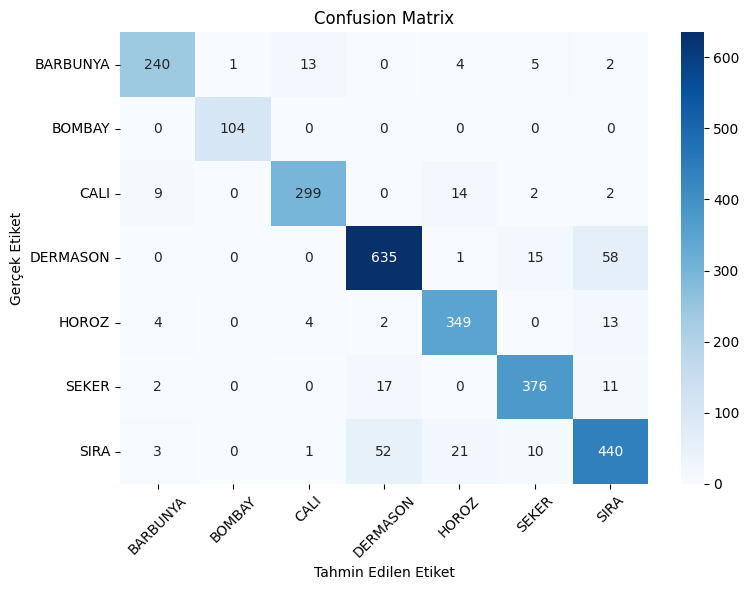

In [30]:
# Sınıf isimleri
class_names = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

# Confusion Matrix görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9018087855297158
Precision: 0.9019748422355098
Recall: 0.9018087855297158
F1 Score: 0.9017879990298602
